In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Upload CSV file
data = pd.read_csv("Data/pd_speech_features.csv")

/home/laura/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(data.iloc[:,:10].head())

   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  
0          0.008064            0.000087       0.00218  
1          0.008258            0.000073       0.00195  
2          0.008340            0.000060       0.00176  
3          0.010858            0.000183       0.00419  
4          0.008162            0.002669       0.00535  


In [3]:
# General information of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None


In [4]:
# Total number of null data
print(data.isnull().sum().sum())

0


In [5]:
# Plot variables
def plot_variables(df,n_rows, n_cols):
    classe = df["class"].astype("category")
    
    #Grid for plots
    n_rows=76
    n_cols=10
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(50,400))
    axes = axes.flatten()
    
    #Create plots
    for i,column in enumerate(df.columns[2:754]):
        ax=axes[i]
        sns.boxplot(x=classe, y=df[column], ax=ax)
        plt.xlabel("Class")
        plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()


In [ ]:
plot_variables(data, 76, 10)

In [6]:
# Descriptive statistics of the first 15 columns and the last one
print(data.iloc[:,list(range(10))+[-1]].describe())

               id      gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834315    0.754985    0.586515  384.250000   
max    251.000000    1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        756.000000        756.000000          756.000000    756.000000   
mean         322.678571          0.006360            0.000383      0.002324   
std           99.402499          

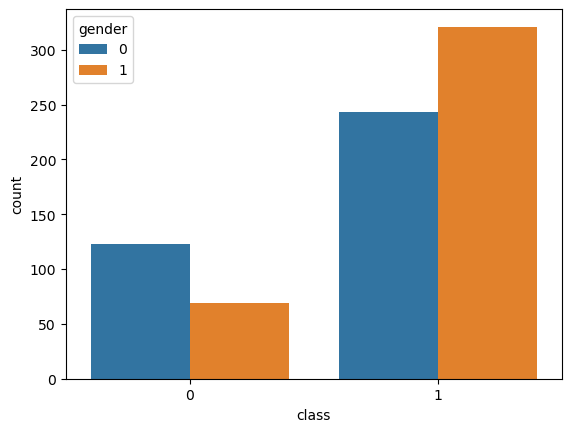

In [7]:
# Descriptive gender and class  --> Només contempla observacions; per nombre pacients (:3)
sns.countplot(x=data["class"], hue=data["gender"])
plt.show()

For the first descriptibes obtained:
Dataset has: 756 rows, 755 columns (749 float numbers, 64 integer)
Fisrt column is patient ID, second column is gender (integer that has to be replaced for a categorical variable) last column is class (also represented as integer).

For the gender variable there is a balanced data for men and women. 
For the class variable there is no balance data: Its about 3/4 of data for Parkinson patients and 1/4 of data for healthy subjects.

There is no null data. 
Data requires normalization: variable PPE min value is arround 0.045 and it's maximum is arround 0.9 with a mean at 0.74. Variable numPulses has a min value of 2 and a max value of 907 with a mean of arround 324. 

## Standarization

For standarization, NOT use MinMaxScaler. As data shown previously there are a lot of outliers that may affect normalization. 
Insted can use Robust Scaler normalization since is not sensitive to outliers and there is no need to assume Gaussian distribution.


In [8]:
from sklearn.preprocessing import RobustScaler

# RobustScaler normalization
normal_data = RobustScaler().fit_transform(data.iloc[:,2:754])
norm_df =pd.DataFrame(normal_data, columns=data.columns[2:754])
norm_data = pd.concat([data.iloc[:,:2], norm_df, data.iloc[:,754]], axis=1)
norm_data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.598958,0.164316,0.439624,-0.577861,-0.577861,0.798102,0.083395,0.441935,...,-0.151578,-0.167497,-0.118822,-0.055422,0.103494,-0.030698,-0.224883,-0.231091,0.145221,1
1,0,1,-0.598678,-0.052950,0.276556,-0.622889,-0.622889,0.875222,-0.028616,0.293548,...,-0.151695,-0.130868,0.938076,0.932229,0.847153,0.524571,-0.011021,-0.052850,0.604107,1
2,0,1,0.576015,-0.226855,0.527384,-0.637899,-0.637899,0.907434,-0.132451,0.170968,...,-0.151491,-0.179390,0.183897,0.590962,0.846095,0.007170,-0.208467,-0.223140,-0.102676,1
3,1,0,-5.574022,0.891251,0.541136,-1.043152,-1.043152,1.904734,0.867789,1.738710,...,-0.068017,-0.132548,-0.044198,0.916810,-0.009693,-0.006135,-0.102963,-0.057015,-0.115029,1
4,1,0,-6.739482,0.901443,0.229651,-0.607880,-0.607880,0.836932,21.194247,2.487097,...,0.022087,-0.046294,0.000167,0.098041,0.438493,0.764574,0.081321,-0.121487,-0.079068,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,-0.008743,-1.269080,-1.002638,0.750469,0.750469,-0.562944,-0.199493,-0.551613,...,-0.094755,-0.153300,-0.159028,-0.225383,-0.090193,-0.132217,-0.183237,-0.220431,-0.065939,0
752,250,0,-9.076557,-1.255739,0.537986,0.735460,0.727955,-0.593534,1.172384,-0.041935,...,-0.136195,-0.201594,-0.228611,-0.224839,0.125662,-0.052806,-0.023088,0.190443,0.310962,0
753,251,0,1.038506,0.211475,-0.081034,0.480300,0.480300,-0.387761,0.213017,-0.474194,...,1.731655,1.417897,1.080260,0.151995,-0.181424,-0.242694,-0.174626,-0.212209,-0.097852,0
754,251,0,0.394013,0.448197,0.069383,0.172608,0.172608,-0.146273,-0.175783,-0.370968,...,0.511288,0.218684,0.154175,-0.253839,-0.296109,-0.305388,-0.221602,-0.240006,-0.121101,0


In [ ]:
# Create new file with normalization data
# norm_data.to_csv("Data/norm_data.csv", index=False)

In [ ]:
plot_variables(norm_data, 10,10)

In [9]:
# List of variables according to group
Gender_Features = norm_data.columns[1]
Baseline_Features = norm_data.columns[2:23].tolist()
Time_Freq_Features = norm_data.columns[23:34].tolist()
Vocal_Fold_Features = norm_data.columns[34:56].tolist()
MFCC_Features = norm_data.columns[56:140].tolist()
WT_FT_Features = norm_data.columns[140:322].tolist()
TQWT_Features = norm_data.columns[322:754].tolist()
Class = norm_data.columns[754]

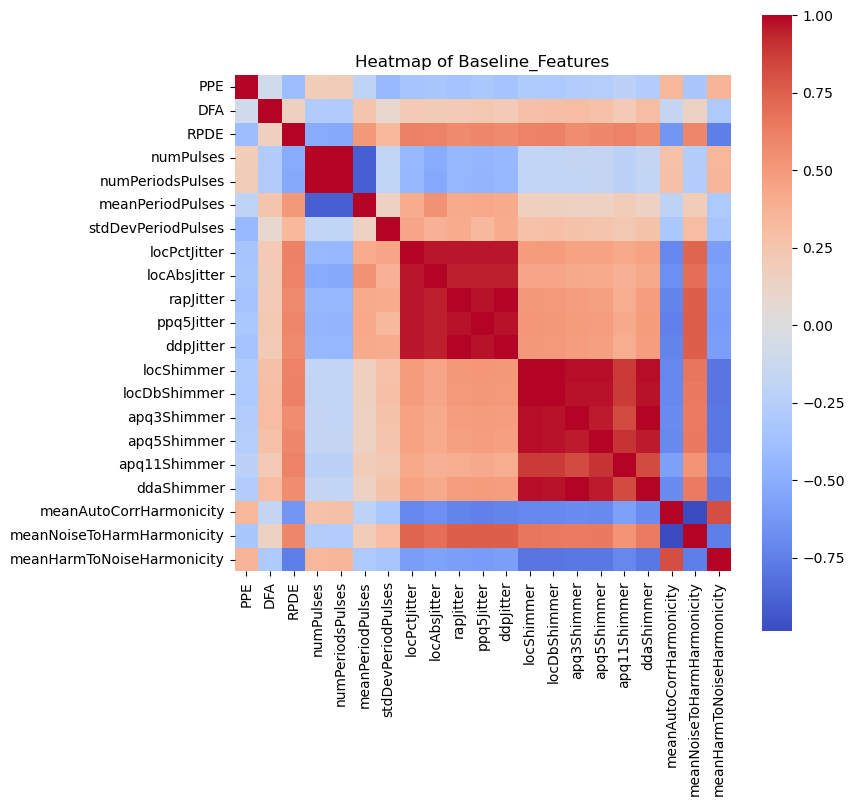

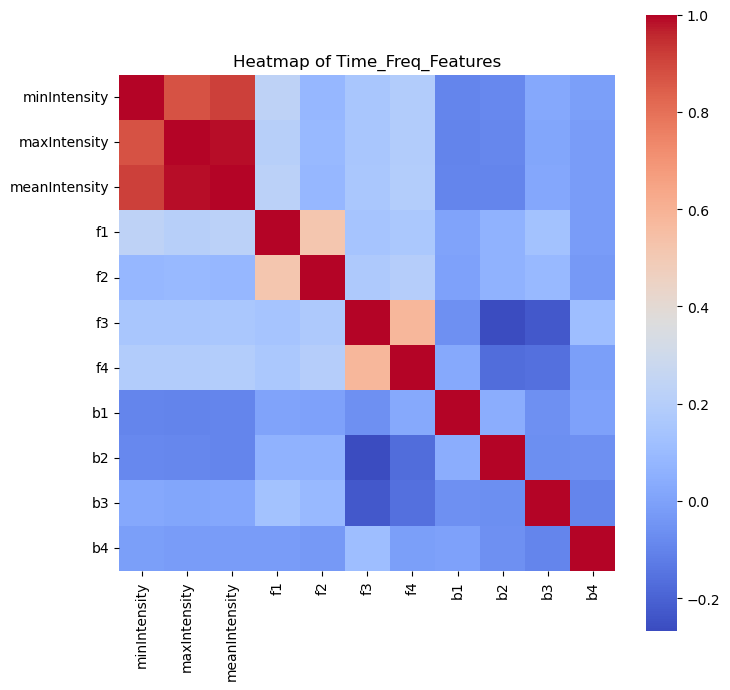

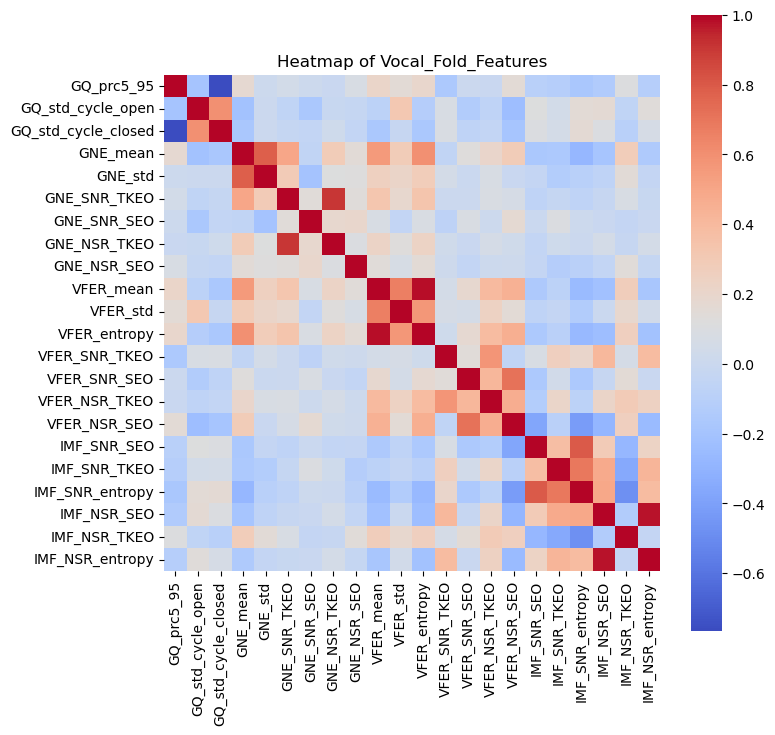

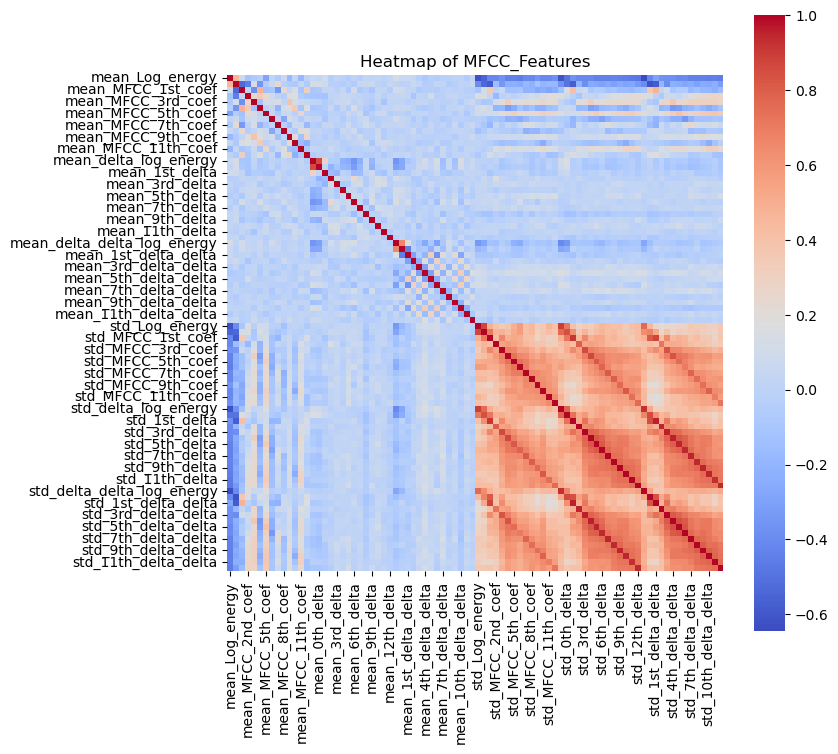

In [10]:
# Correlation of different Features groups

feature_groups = [Baseline_Features, Time_Freq_Features, 
                  Vocal_Fold_Features, MFCC_Features]
feature_names = ["Baseline_Features", "Time_Freq_Features", 
                 "Vocal_Fold_Features", "MFCC_Features"]
for i,features in enumerate(feature_groups):
    selected_features = norm_data[features]
    correlation_matrix = selected_features.corr()
    plt.figure(figsize=(8,8))
    sns.heatmap(correlation_matrix, cmap="coolwarm", square=True)
    plt.title(f"Heatmap of {feature_names[i]}")
    plt.show()

Some of the variables in each group of variables present high correlation. At some point could be interesting to perform feature selection or extraction of characteristics to reduce dimensionality and redundancy.